## Develop A Neural Network That Can Read Handwriting

### Author:Anam Nawaz Khan

### Begin your neural network machine learning project with the MNIST Handwritten Digit Classification

### Import Libraries

In [107]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout
import numpy as np
from keras.utils.generic_utils import get_custom_objects

We are going to use handwritten Keras libary it will load train and test digit dataset into these variables.

In [108]:
(X_train,y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

In [109]:
#let see how many samples we have
len(X_train)

60000

In [110]:
len(X_test)

10000

In [111]:
#each induvisal sample
X_train[0].shape 

(28, 28)

it shows 28 by 28 pixcel image

In [112]:
X_train[0] #weight rep number its 2 dem array 0 mean black point 255 mean white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Randomly Checking traning image

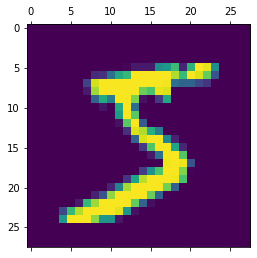

In [113]:
plt.matshow(X_train[0])
plt.show()

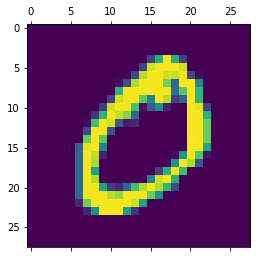

In [114]:
plt.matshow(X_train[1])
plt.show()

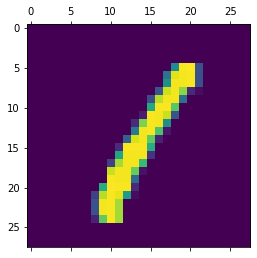

In [115]:
plt.matshow(X_train[3])
plt.show()

Check out position

In [116]:
y_train[2] #in no 2 position there is no 4

4

In [117]:
y_train[3]

1

y_train lookout overall 

In [118]:
y_train[:5] #it is containg no 0 to 9

array([5, 0, 4, 1, 9], dtype=uint8)

Flatten our traning dataset because we convert into single dimension array

In [119]:
X_train.shape #first dem of sample is 60000 and 2 and 3 dem is each in nural image 

(60000, 28, 28)

In [120]:
len(X_test)

10000

In [121]:
X_train = X_train / 255
X_test = X_test / 255

In [122]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [123]:
X_train_flattened=X_train.reshape(len(X_train),28*28) #we want to converted 2d array into 1d arry through flatten X_train and X_test
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [124]:
X_test_flattened.shape #first dem is 10000 and 2nd dem is 784

(10000, 784)

In [125]:
X_train_flattened[0] #it will converted

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Created Neural Network

In [126]:
keras.losses.CategoricalCrossentropy(from_logits=True)
#Sequential means i am having stack of layers in my NN every layer as one element.
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
#optimizer train efficiently backwordpropgation and is traing going on  



In [127]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [128]:
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4698 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9247
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.9250


#### I want to increase my accuracy so i scaled my values 255 divid by whole array

##### 92% accuracy means accurate train data

In [129]:
#evaluate the accuracy on test data set
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2666 - accuracy: 0.9271


[0.2665654420852661, 0.9271000027656555]

##### same 92% accuracy this model pretty good

In [130]:
#predict our test data
model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


array([[1.7835567e-02, 3.3575552e-07, 6.4988486e-02, ..., 9.9980873e-01,
        7.6804720e-02, 6.6607505e-01],
       [3.6785927e-01, 6.4660534e-03, 9.9959058e-01, ..., 7.8613727e-13,
        9.9847667e-02, 4.5006341e-09],
       [4.7576247e-04, 9.9397290e-01, 6.7172068e-01, ..., 1.5513328e-01,
        3.6938706e-01, 4.8598796e-02],
       ...,
       [2.0961061e-06, 3.7748705e-06, 1.3325735e-03, ..., 2.8874326e-01,
        4.1917375e-01, 7.1902126e-01],
       [9.2857001e-05, 2.2990488e-04, 2.6355375e-04, ..., 6.6430468e-05,
        5.6862986e-01, 1.4214097e-04],
       [5.3647081e-03, 2.4112856e-10, 2.9493344e-01, ..., 5.7193854e-09,
        1.0820174e-04, 4.3643178e-07]], dtype=float32)

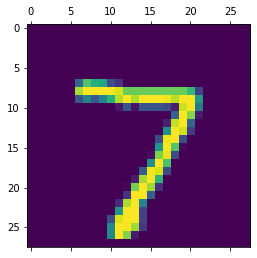

In [131]:
#only prediction for first image
plt.matshow(X_test[0])
plt.show()

In [132]:
#predicted all the values
y_predicted = model.predict(X_test_flattened)
y_predicted[0] #0 is my first image

313/313 [==============================] - 0s 1ms/step


array([1.78355668e-02, 3.35755516e-07, 6.49884865e-02, 9.47636306e-01,
       2.12376541e-03, 1.21190846e-01, 2.20244169e-06, 9.99808729e-01,
       7.68047199e-02, 6.66075051e-01], dtype=float32)

In [133]:
#lookout the max score
np.argmax(y_predicted[0])

7

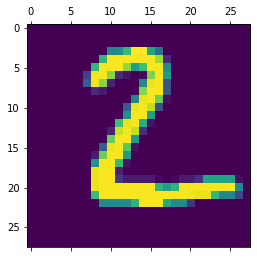

In [134]:
plt.matshow(X_test[1]) #test our model
plt.show()

In [135]:
np.argmax(y_predicted[1])

2

Over actual prediction

### How our prediction look like we build confusion matrix

In [136]:
y_test[:5] #these are integers values and predictions values are whole number so we convert y_pred into concrate class label.

array([7, 2, 1, 0, 4], dtype=uint8)

In [137]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [138]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    6,    8,    2,    1,    0],
       [   0, 1118,    4,    1,    0,    1,    4,    2,    5,    0],
       [   3,    9,  947,   13,    8,    5,   12,    9,   21,    5],
       [   1,    0,   24,  920,    0,   24,    2,   12,   19,    8],
       [   1,    2,    4,    1,  917,    0,   11,    4,    8,   34],
       [   7,    3,    4,   31,    9,  789,   14,    4,   26,    5],
       [   6,    3,    9,    1,    7,   15,  915,    2,    0,    0],
       [   1,    5,   25,    5,    7,    1,    0,  955,    2,   27],
       [   8,   12,   10,   28,    9,   36,   10,   14,  840,    7],
       [   9,    7,    2,   10,   28,    8,    0,   31,    4,  910]])>

## Vizulization of confusion matrix

In [139]:
import seaborn as sns

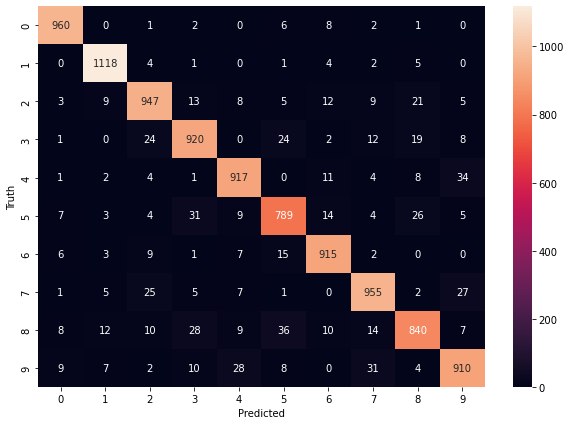

In [140]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### Anything not in digonals its error our model distributed the error in a very good way

In [141]:
## Checking hidden layers 
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid') #last layer
])

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2740 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1245 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0876 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9837


#### Accuracy increase 92% to 98%

313/313 [==============================] - 1s 2ms/step


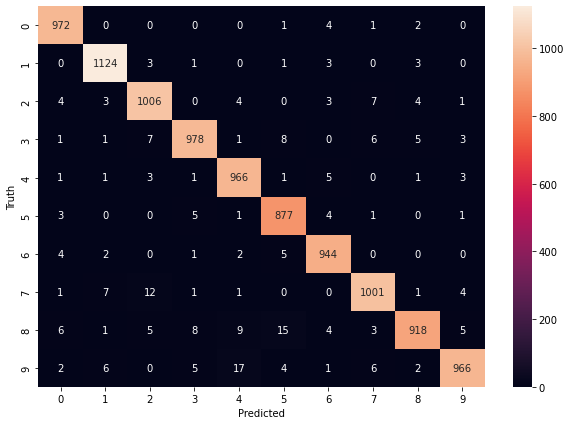

In [142]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### Numbers of error decreases our model is predicted accurately